In [1]:
import napari 
import yt 

In [55]:
ds = yt.load_sample("snapshot_033")

yt : [INFO     ] 2023-10-06 15:25:22,027 Sample dataset found in '/home/chavlin/hdd/data/yt_data/yt_sample_sets/snapshot_033/snap_033.0.hdf5'
yt : [INFO     ] 2023-10-06 15:25:22,110 Parameters: current_time              = 4.343952725460923e+17 s
yt : [INFO     ] 2023-10-06 15:25:22,111 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-10-06 15:25:22,111 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-10-06 15:25:22,112 Parameters: domain_right_edge         = [25. 25. 25.]
yt : [INFO     ] 2023-10-06 15:25:22,112 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-10-06 15:25:22,114 Parameters: current_redshift          = -4.811891664902035e-05
yt : [INFO     ] 2023-10-06 15:25:22,114 Parameters: omega_lambda              = 0.762
yt : [INFO     ] 2023-10-06 15:25:22,115 Parameters: omega_matter              = 0.238
yt : [INFO     ] 2023-10-06 15:25:22,115 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-10-06 15:

In [65]:
fname = ds.add_deposited_particle_field(
    ("PartType0", "density"), method="nearest"
)

In [66]:
fname

('deposit', 'PartType0_nn_density')

In [71]:
r = ds.region(ds.domain_center, ds.domain_left_edge, ds.domain_right_edge)

In [73]:
cg = ds.r[::256j, ::256j, ::256j]

In [82]:
cg[('gas', 'density')].max()

unyt_quantity(1.30310218e-23, 'g/cm**3')

Traceback (most recent call last):
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/napari/_qt/layer_controls/qt_labels_controls.py", line 336, in changeSelection
    self.layer.selected_label = value
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/napari/layers/labels/labels.py", line 608, in selected_label
    self._selected_color = self.get_color(selected_label)
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/napari/layers/labels/labels.py", line 970, in get_color
    val = self._raw_to_displayed(np.array([label]))
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/napari/layers/labels/labels.py", line 938, in _raw_to_displayed
    image = self._color_lookup_func(raw_modified, self._selected_label)
  File "/home/chavlin/.pyenv/versions/3.9.16/envs/ytnapari/lib/python3.9/site-packages/napari/layers/labels/labels.py", line 810, in _loo

In [57]:
x = ad[('PartType0', 'particle_position_x')]

y = ad[('PartType0', 'particle_position_y')]
z = ad[('PartType0', 'particle_position_z')]

dens = ad[('PartType0', 'density')]

In [58]:
import numpy as np 

np.log10(x.size)

6.288076099447756

In [59]:
v = napari.Viewer()


In [60]:
v.layers.clear()
sample_range = range(0,x.size)

In [61]:
x = (x - x.min())/ (x.max() - x.min())
y = (y - y.min())/ (y.max() - y.min())
z = (z - z.min())/ (z.max() - z.min())

In [62]:


coords = np.column_stack([x, y, z])
coords = coords[sample_range, :]

dens_sub = np.log10(dens[sample_range])
coords.shape

(1941226, 3)

In [63]:
v.add_points(
        coords*400,
        properties={'density': dens_sub},
        face_color='density',
        size=1,
        )

<Points layer 'Points' at 0x7f99d14dd970>

In [80]:
print(ds.domain_right_edge)

[25. 25. 25.] code_length


yt_napari : [INFO ] 2023-10-06 15:35:12,408:  loading /home/chavlin/hdd/data/yt_data/yt_sample_sets/snapshot_033/snap_033.0.hdf5 from cache.
Interpolating SPH field ('PartType0', 'Density'): 4400000it [00:52, 84462.54it/s] 


yt : [INFO     ] 2023-10-06 15:34:28,603 xlim = 0.000000 25.000000
yt : [INFO     ] 2023-10-06 15:34:28,603 ylim = 0.000000 25.000000
yt : [INFO     ] 2023-10-06 15:34:28,605 xlim = 0.000000 25.000000
yt : [INFO     ] 2023-10-06 15:34:28,606 ylim = 0.000000 25.000000
yt : [INFO     ] 2023-10-06 15:34:28,607 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



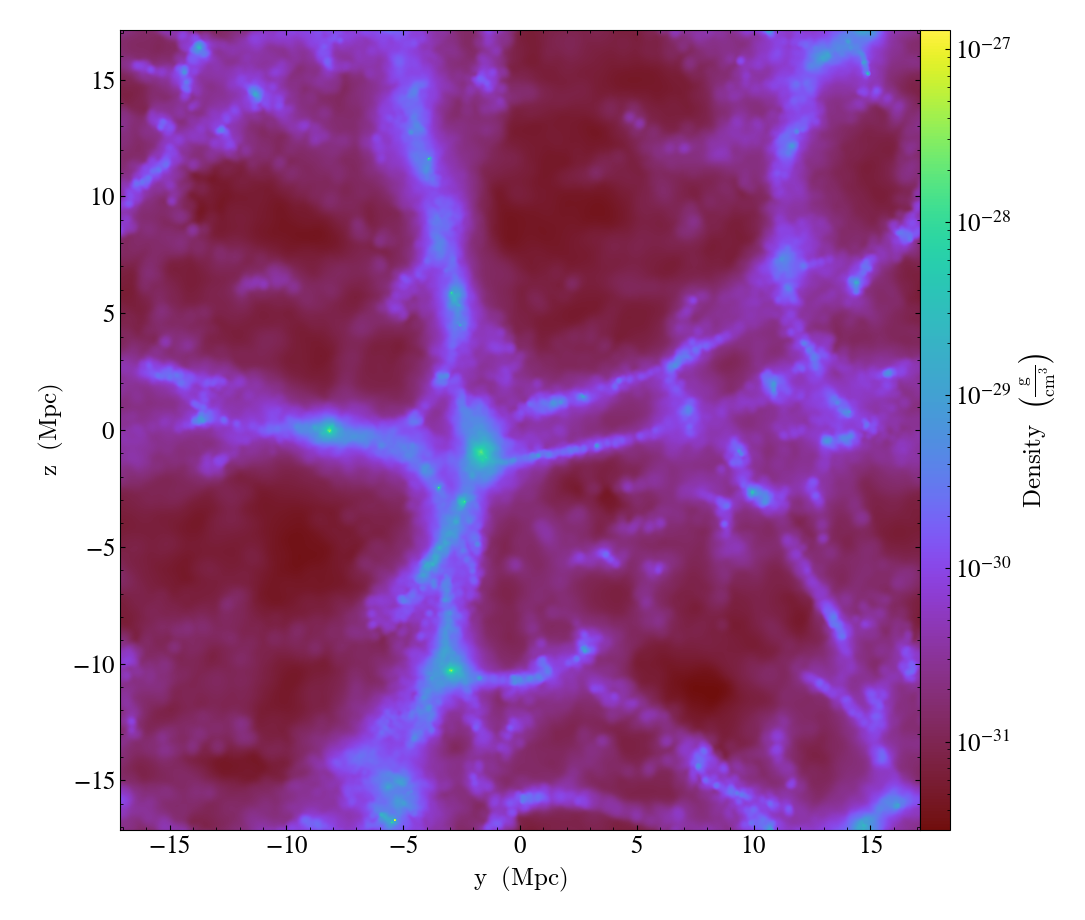

In [76]:
yt.SlicePlot(ds, 'x', ('gas', 'density'))